In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [2]:
# Read in data
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
print(df["koi_disposition"].unique())

['CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE']


In [4]:
df.shape

(6991, 41)

# Select features (columns)

In [5]:
# Set X equal to the entire data set, except for the first column
X = df.iloc[:,1:]

# Set y equal to the first column
y = df.iloc[:,0]

In [6]:
# Search for top 10 features according to feature importances
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.15319502, 0.16033957, 0.13729341, 0.03996976, 0.01380175,
       0.02283236, 0.01672763, 0.01368849, 0.02498441, 0.01780931,
       0.01265519, 0.01052978, 0.01051754, 0.01596252, 0.02445171,
       0.02961419, 0.01828931, 0.01261093, 0.01846786, 0.01355925,
       0.00881201, 0.00909621, 0.01541784, 0.00992432, 0.00928801,
       0.00809632, 0.03020725, 0.00712729, 0.01029019, 0.01288934,
       0.01383398, 0.01071037, 0.01130123, 0.01091534, 0.00973578,
       0.01319095, 0.00945068, 0.01094345, 0.00930171, 0.01216771])

In [7]:
# Store the top 10 features as a series, using the column headers as the index
feat_imp = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_imp

koi_fpflag_ss        0.160340
koi_fpflag_nt        0.153195
koi_fpflag_co        0.137293
koi_fpflag_ec        0.039970
koi_model_snr        0.030207
koi_duration_err2    0.029614
koi_time0bk_err1     0.024984
koi_duration_err1    0.024452
koi_period_err1      0.022832
koi_depth_err2       0.018468
dtype: float64

In [8]:
# Set features based on feature importances
X = df[feat_imp.index]

# Use koi_disposition for y values
y = df['koi_disposition']

# Create a Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Find Best K

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range (5, 35, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train: {train_score:.3f}, Test: {test_score:.3f}")

k: 5, Train: 0.901, Test: 0.880
k: 8, Train: 0.893, Test: 0.882
k: 11, Train: 0.888, Test: 0.891
k: 14, Train: 0.887, Test: 0.886
k: 17, Train: 0.883, Test: 0.885
k: 20, Train: 0.883, Test: 0.888
k: 23, Train: 0.880, Test: 0.890
k: 26, Train: 0.879, Test: 0.888
k: 29, Train: 0.879, Test: 0.887
k: 32, Train: 0.878, Test: 0.887


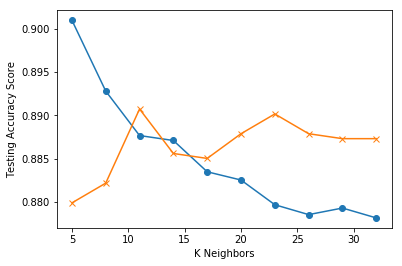

In [12]:
# Plot training and testing scores
plt.plot(range(5, 35, 3), train_scores, marker='o')
plt.plot(range(5, 35, 3), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Current best k value looks like k=14

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [25]:
from sklearn.model_selection import GridSearchCV

# Initialize new classifer outside of loop
knn = KNeighborsClassifier()

# Create the GridSearchCV model
param_grid = dict(n_neighbors=list(range(5, 55)))

grid = GridSearchCV(knn, param_grid, cv=100, scoring='accuracy', verbose=1)

In [26]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  3.1min finished


GridSearchCV(cv=100, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [27]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 14}
0.8765973679191302


# Predict
Predict with new parameters

In [28]:
# Initialize classifier
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors']) # Set number of neighbors equal to the best parameters

# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [29]:
# Predict on test set
df = pd.DataFrame({'Actual':y_test, 'Predicted':knn.predict(X_test_scaled)})
df.head(10)

,Actual,Predicted
6940,CANDIDATE,CANDIDATE
5669,FALSE POSITIVE,FALSE POSITIVE
1680,CANDIDATE,CONFIRMED
3806,FALSE POSITIVE,FALSE POSITIVE
6731,CANDIDATE,CANDIDATE
5014,FALSE POSITIVE,FALSE POSITIVE
3422,FALSE POSITIVE,FALSE POSITIVE
2438,CONFIRMED,CONFIRMED
5982,FALSE POSITIVE,FALSE POSITIVE
5687,FALSE POSITIVE,FALSE POSITIVE


In [30]:
# Score the model
knn.score(X_test_scaled, y_test)

0.88558352402746